# Loader + KDE

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from VMSfunctions.Common import save_obj, load_obj
from VMSfunctions.DataGenerator import DataSource, DensityEstimator, PeakSampler

### 1. Load justin beer/urine data

In [4]:
ds = DataSource(min_ms1_intensity=250000, min_ms2_intensity=5000)
ds.load_data('C:\\Users\\joewa\\Work\\clms\\\FourBeers_mzML_files\\POS\\')
# ds.load_data('C:\\Users\\joewa\\Work\\clms\\Urines100Study_mzml_files_peaklist\\mzml_files')

C:\Users\joewa\Work\clms\\FourBeers_mzML_files\POS\Beer_1_T10_POS.mzML (ms1=143298, ms2=80212)
C:\Users\joewa\Work\clms\\FourBeers_mzML_files\POS\Beer_2_T10_POS.mzML (ms1=141176, ms2=78990)
C:\Users\joewa\Work\clms\\FourBeers_mzML_files\POS\Beer_3_T10_POS.mzML (ms1=138130, ms2=74409)
C:\Users\joewa\Work\clms\\FourBeers_mzML_files\POS\Beer_QC_T10_POS.mzML (ms1=138075, ms2=71365)


### 2. Train ms1 densities

In [5]:
densities = DensityEstimator()

In [6]:
ms_level = 1

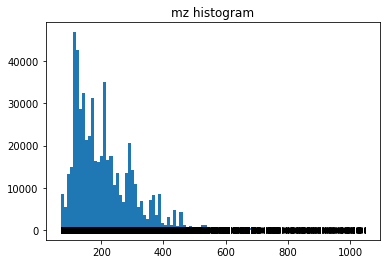

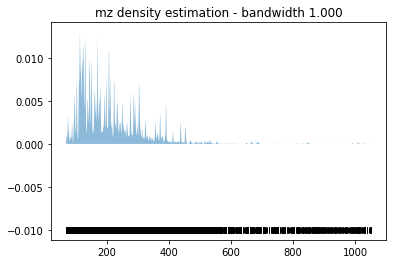

array([[112.74977173],
       [120.34899275],
       [171.61465905],
       [ 75.94356205],
       [213.02232966],
       [143.56368202],
       [178.10554005],
       [392.63005729],
       [127.15465014],
       [223.56973184]])

In [7]:
data_type = 'mz'
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)
densities.sample(data_type, ms_level, 10)

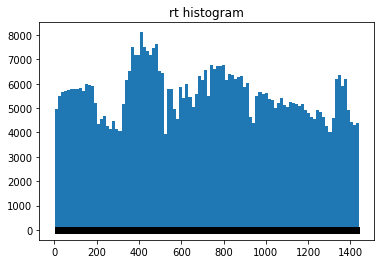

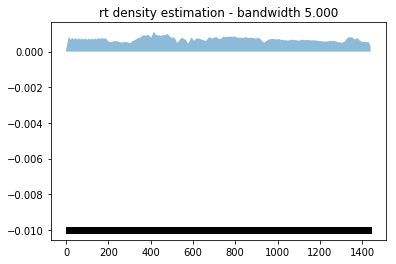

array([[ 615.90269009],
       [ 362.511883  ],
       [1368.9491104 ],
       [1237.15354488],
       [1329.99541494],
       [1022.8162514 ],
       [ 212.61699468],
       [ 190.43857022],
       [ 774.73464394],
       [1049.65873747]])

In [8]:
data_type = 'rt'
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5, plot=True)
densities.sample(data_type, ms_level, 10)

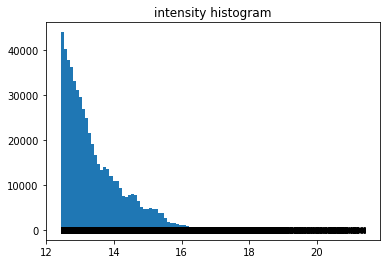

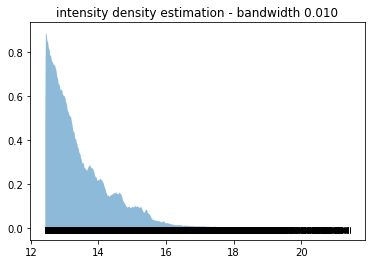

array([[ 348576.92493997],
       [ 300318.74925899],
       [5533201.9015219 ],
       [1061434.94426214],
       [ 600407.86170473],
       [1110525.86430925],
       [ 412594.20169655],
       [ 327703.30935842],
       [ 482183.41341318],
       [7411878.23057249]])

In [9]:
data_type = 'intensity'
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)
np.exp(densities.sample(data_type, ms_level, 10))

### 3. Train ms2 densities

In [10]:
ms_level = 2

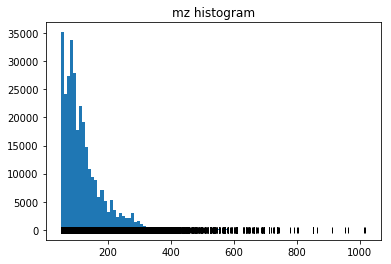

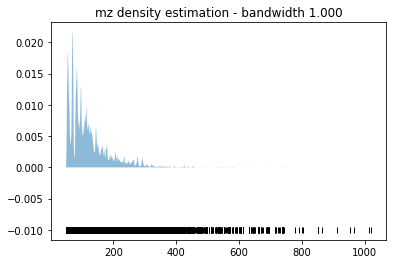

array([[242.35779113],
       [114.45237336],
       [133.70314272],
       [145.29887006],
       [159.5432269 ],
       [ 70.69057656],
       [119.49716446],
       [205.44595869],
       [106.7283254 ],
       [136.87688836]])

In [11]:
data_type = 'mz'
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)
densities.sample(data_type, ms_level, 10)

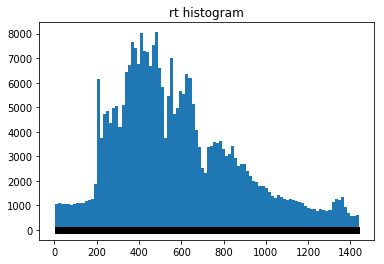

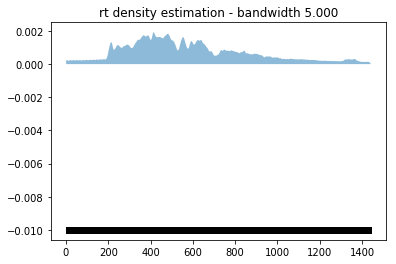

array([[ 854.88742231],
       [ 725.94939427],
       [ 581.30581784],
       [ 636.55672616],
       [ 545.32428268],
       [ 407.10140763],
       [1081.5187306 ],
       [ 528.01167325],
       [ 276.36952628],
       [1029.03033762]])

In [12]:
data_type = 'rt'
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5, plot=True)
densities.sample(data_type, ms_level, 10)

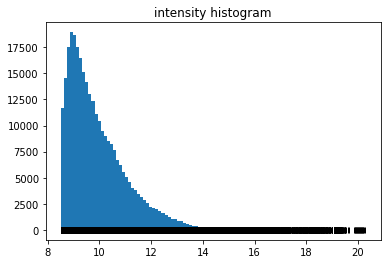

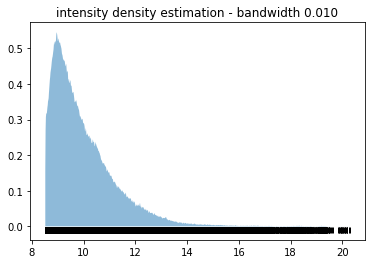

array([[ 24195.91410262],
       [  9150.05392673],
       [ 85666.97735614],
       [  6342.80483573],
       [  8598.84935746],
       [ 32431.3299937 ],
       [ 25532.78316943],
       [458043.39293787],
       [  9499.0419047 ],
       [ 18375.8597095 ]])

In [13]:
data_type = 'intensity'
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)
np.exp(densities.sample(data_type, ms_level, 10))

In [14]:
ps = PeakSampler(densities)
save_obj(ps, '../models/peak_sampler_4_beers.p')

### 4. Generate some synthetic peaks

In [15]:
ps = load_obj('../models/peak_sampler_4_beers.p')

In [16]:
ps.sample(ms_level=1, n_peaks=10)

[Peak mz=151.5811 rt=1042.89 intensity=2484381.57 ms_level=1,
 Peak mz=167.8325 rt=1281.77 intensity=2771974.11 ms_level=1,
 Peak mz=173.7743 rt=129.69 intensity=1820006.44 ms_level=1,
 Peak mz=78.7108 rt=109.62 intensity=276159.95 ms_level=1,
 Peak mz=276.4323 rt=742.15 intensity=253757.85 ms_level=1,
 Peak mz=191.5915 rt=721.09 intensity=566869.19 ms_level=1,
 Peak mz=127.8240 rt=886.10 intensity=338326.33 ms_level=1,
 Peak mz=370.0625 rt=754.14 intensity=365708.10 ms_level=1,
 Peak mz=131.7459 rt=1375.96 intensity=1860907.44 ms_level=1,
 Peak mz=197.1460 rt=1070.02 intensity=483626.08 ms_level=1]

In [17]:
ps.sample(ms_level=2, n_peaks=10)

[Peak mz=69.7325 rt=348.24 intensity=8739.62 ms_level=2,
 Peak mz=83.1517 rt=424.72 intensity=45346.16 ms_level=2,
 Peak mz=143.0688 rt=442.87 intensity=23583.28 ms_level=2,
 Peak mz=156.9420 rt=273.57 intensity=90914.65 ms_level=2,
 Peak mz=65.1551 rt=474.22 intensity=6875.79 ms_level=2,
 Peak mz=213.8439 rt=219.13 intensity=6369.50 ms_level=2,
 Peak mz=207.7333 rt=465.77 intensity=5548.56 ms_level=2,
 Peak mz=114.4904 rt=689.05 intensity=39878.26 ms_level=2,
 Peak mz=107.3597 rt=1388.59 intensity=23822.29 ms_level=2,
 Peak mz=87.6443 rt=958.16 intensity=10528.10 ms_level=2]